# Card Transaction Analysis
this Dataset includes  over 50k Card Transactions across over different categories and dates. U can find the dataset used for this analysis here:
 https://www.kaggle.com/datasets/rajatsurana979/comprehensive-credit-card-transactions-dataset/data


## Data Importing 

 Importing necessary Libaries and dataset.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('~/Documents/projects/credit_card_transaction_flow.csv')
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


## Data Cleaning

In [28]:
#this is used to drop all missing values
df['Gender'].fillna("None", inplace=True)
df.isna().sum()

/var/folders/lw/0sjqvp_s7f71nzp_rlj1mfnw0000gn/T/ipykernel_21227/1364402957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna("None", inplace=True)


Customer ID           0
Name                  0
Surname               0
Gender                0
Birthdate             0
Transaction Amount    0
Date                  0
Merchant Name         0
Category              0
dtype: int64

Lets change the Columns "Birthdate" and "Date" datetime to format D/M/Y

this will make it much easier later on for data visualization and to create day columns for data exploration

In [29]:
df["Birthdate"] = pd.to_datetime(df["Birthdate"], format = "%d-%m-%Y")
df["Date"] = pd.to_datetime(df["Date"], format= "%d-%m-%Y")

In [30]:
#I changed Customer ID to string to avoid issuses with tabling data for data analysis
df["Customer ID"] = df["Customer ID"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         50000 non-null  object        
 1   Name                50000 non-null  object        
 2   Surname             50000 non-null  object        
 3   Gender              50000 non-null  object        
 4   Birthdate           50000 non-null  datetime64[ns]
 5   Transaction Amount  50000 non-null  float64       
 6   Date                50000 non-null  datetime64[ns]
 7   Merchant Name       50000 non-null  object        
 8   Category            50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 3.4+ MB


## Data Exploration

In [31]:
df["Gender"].value_counts(normalize=True)

Gender
F       0.45426
M       0.44480
None    0.10094
Name: proportion, dtype: float64

In [32]:
results = df.groupby("Gender")["Transaction Amount"].sum()
results

Gender
F       10119120.24
M        9794882.81
None     2191958.92
Name: Transaction Amount, dtype: float64

This data tells us that the transaction amount is almost evenly dispursed between male and female. I kept the None value in the data as it could be from the customer listing their gender as "Other"

['Female', 'Male', 'None']


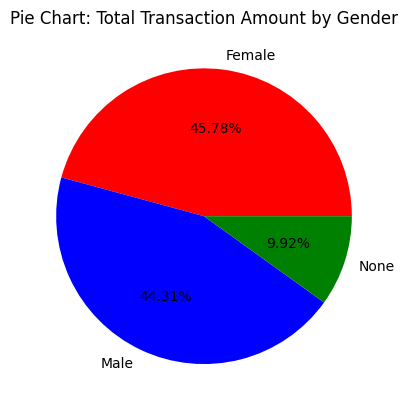

In [33]:
%matplotlib inline 

topic = ['Female', 'Male', 'None']
labels = list(topic)
print(labels)
colors = ['Red', 'Blue', 'green']
plt.pie(results, labels=labels,colors= colors, autopct= "%1.2f%%")
plt.title("Pie Chart: Total Transaction Amount by Gender")
plt.show()

Now lets see the Total Transaction Amount per Category:

In [34]:
trans_data = df.groupby("Category")['Transaction Amount'].sum()
trans_data

Category
Clothing        1319342.47
Cosmetic         876672.44
Electronics     4394092.10
Market          2151134.42
Restaurant       464488.60
Travel         12900231.94
Name: Transaction Amount, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


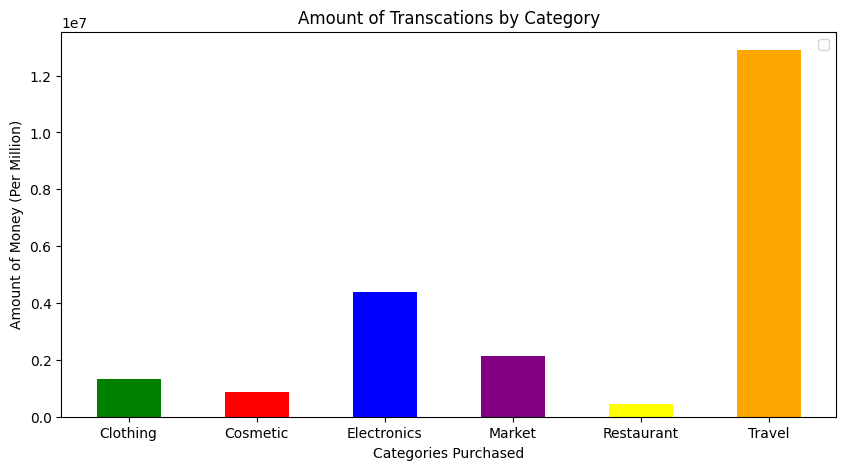

In [50]:
%matplotlib inline
data = {'Clothing':1319342.47,'Cosmetic':876672.44,'Electronics':4394092.10,'Market':2151134.42,'Restaurant':464488.60,'Travel':12900231.94}
categories = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize= (10,5))
colors =['green','red','blue','purple','yellow','orange']
plt.bar(categories,values, color=colors, width=.5)
plt.xlabel('Categories Purchased')
plt.ylabel('Amount of Money (Per Million)')
plt.title("Amount of Transcations by Category")
plt.legend()
plt.show()

From the data shown above Travel was the most spent Category while Resturant and Cosmetic were the lest spent on.

After seeing the Transaction totals distinctly for Gender and Categorys. Lets See the Spending patterns of Categorys by Genders

In [36]:
gender_transaction = df.groupby(['Gender','Category']).agg({"Transaction Amount": ["sum","mean"]})
gender_transaction

Transaction Amount             
                                  sum         mean
Gender Category                                   
F      Clothing             587938.88   160.507475
       Cosmetic             407487.58   106.560560
       Electronics         1977312.00   521.168160
       Market               959849.62   256.781600
       Restaurant           211185.65    55.096700
       Travel              5975346.51  1547.616294
M      Clothing             594994.60   159.174585
       Cosmetic             383398.72   106.028407
       Electronics         1994008.68   533.157401
       Market               960420.88   256.112235
       Restaurant           205370.81    55.595780
       Travel              5656689.12  1528.008947
None   Clothing             136408.99   158.615105
       Cosmetic              85786.14   106.832055
       Electronics          422771.42   535.153696
       Market               230863.92   258.237047
       Restaurant            47932.14    54.099481
       Travel              1268196.31  1557.980725

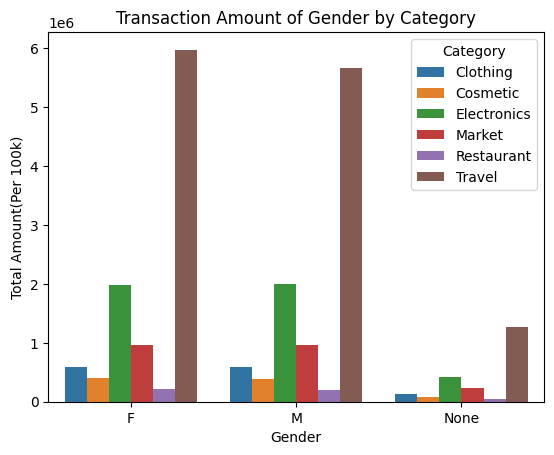

In [51]:
sns.barplot(data=gender_transaction.reset_index(), x="Gender", y=gender_transaction.reset_index()['Transaction Amount']["sum"], hue = "Category")
plt.title("Transaction Amount of Gender by Category")
plt.ylabel("Total Amount(Per 100k)")
plt.show()


From the Table we can see that the transaction totals per gender in categories are evenly dispursed as well.

To Create a better understanding of the data, I created a boxplot to see the distribution of money spent in each category

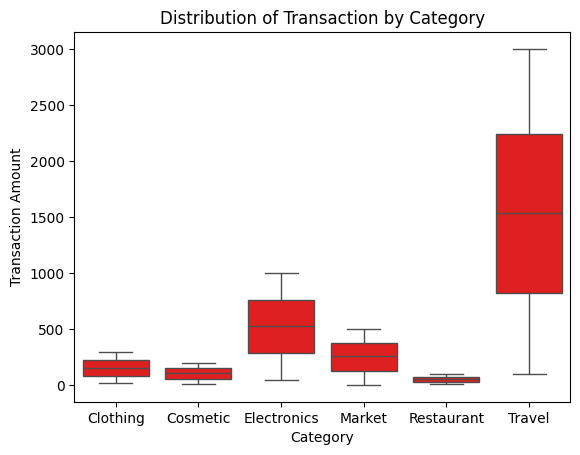

In [38]:
sns.boxplot(data =df, x="Category",y="Transaction Amount", color = "red",order= list(trans_data.index) )
plt.title("Distribution of Transaction by Category")
plt.show()

In [25]:
#Creating a new table with just these 3 columns for clear analysis for month column added
ts_df = df[["Date", "Transaction Amount", "Category"]]
ts_df.head()

,Date,Transaction Amount,Category
0,2023-04-03,35.47,Cosmetic
1,2023-07-17,2552.72,Travel
2,2023-09-20,115.97,Clothing
3,2023-01-11,11.31,Cosmetic
4,2023-06-13,62.21,Electronics


now lets see the total spending patterns by month using dt.month function

In [17]:
ts_df["Month"] = ts_df["Date"].dt.month

/var/folders/lw/0sjqvp_s7f71nzp_rlj1mfnw0000gn/T/ipykernel_21227/990969619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df["Month"] = ts_df["Date"].dt.month


we can now plot the total monthly transactions by month as well average spending

Text(0.5, 1.0, 'Transaction Amount by Month')

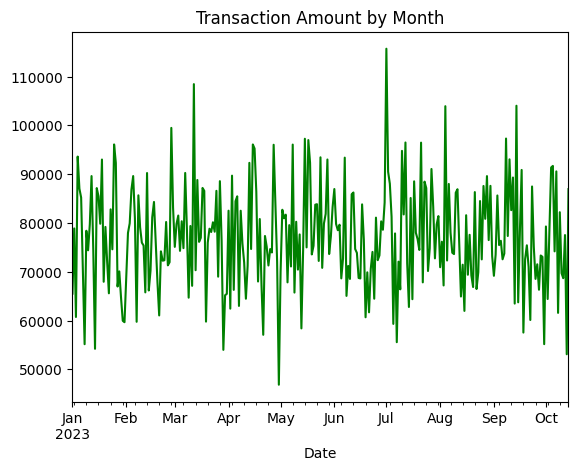

In [40]:
time_data = ts_df.groupby("Date").agg({"Transaction Amount": ["sum","mean"]})['Transaction Amount']
time_data["sum"].plot(color="green")
plt.title("Transaction Amount by Month")


Text(0.5, 1.0, 'Average Transaction Amount Per Month')

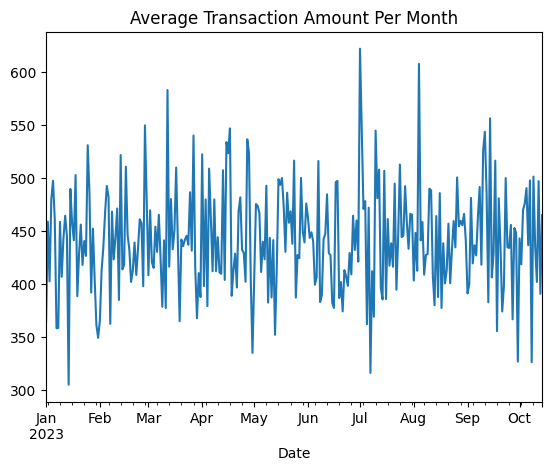

In [52]:
time_data["mean"].plot()
plt.title("Average Transaction Amount Per Month")

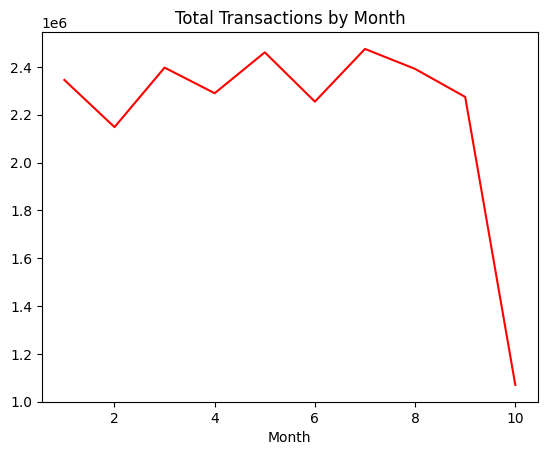

In [20]:
month_data = ts_df.groupby("Month").agg({"Transaction Amount": ["sum","mean"]})["Transaction Amount"]
month_data["sum"].plot(color="red")
plt.title("Total Transactions by Month")
plt.show()

Text(0.5, 1.0, 'Average Monthy Transaction Totals')

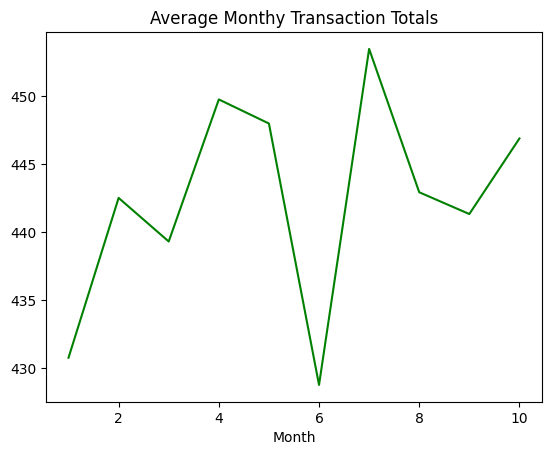

In [41]:
month_data["mean"].plot(color="green")
plt.title("Average Monthy Transaction Totals")

from the tables show July was the busiest month with the most transaction amount while feburary had the least. June averaged the least amount per transaction while July had the most.

Lets see the spending patterns per day to see if there is a pattern in spending in perticular day of the month.

In [42]:
ts_df["Day"] =ts_df["Date"].dt.day
ts_df.head()

,Date,Transaction Amount,Category,Day
0,2023-04-03,35.47,Cosmetic,3
1,2023-07-17,2552.72,Travel,17
2,2023-09-20,115.97,Clothing,20
3,2023-01-11,11.31,Cosmetic,11
4,2023-06-13,62.21,Electronics,13


Text(0.5, 1.0, 'Transaction Amount by Day')

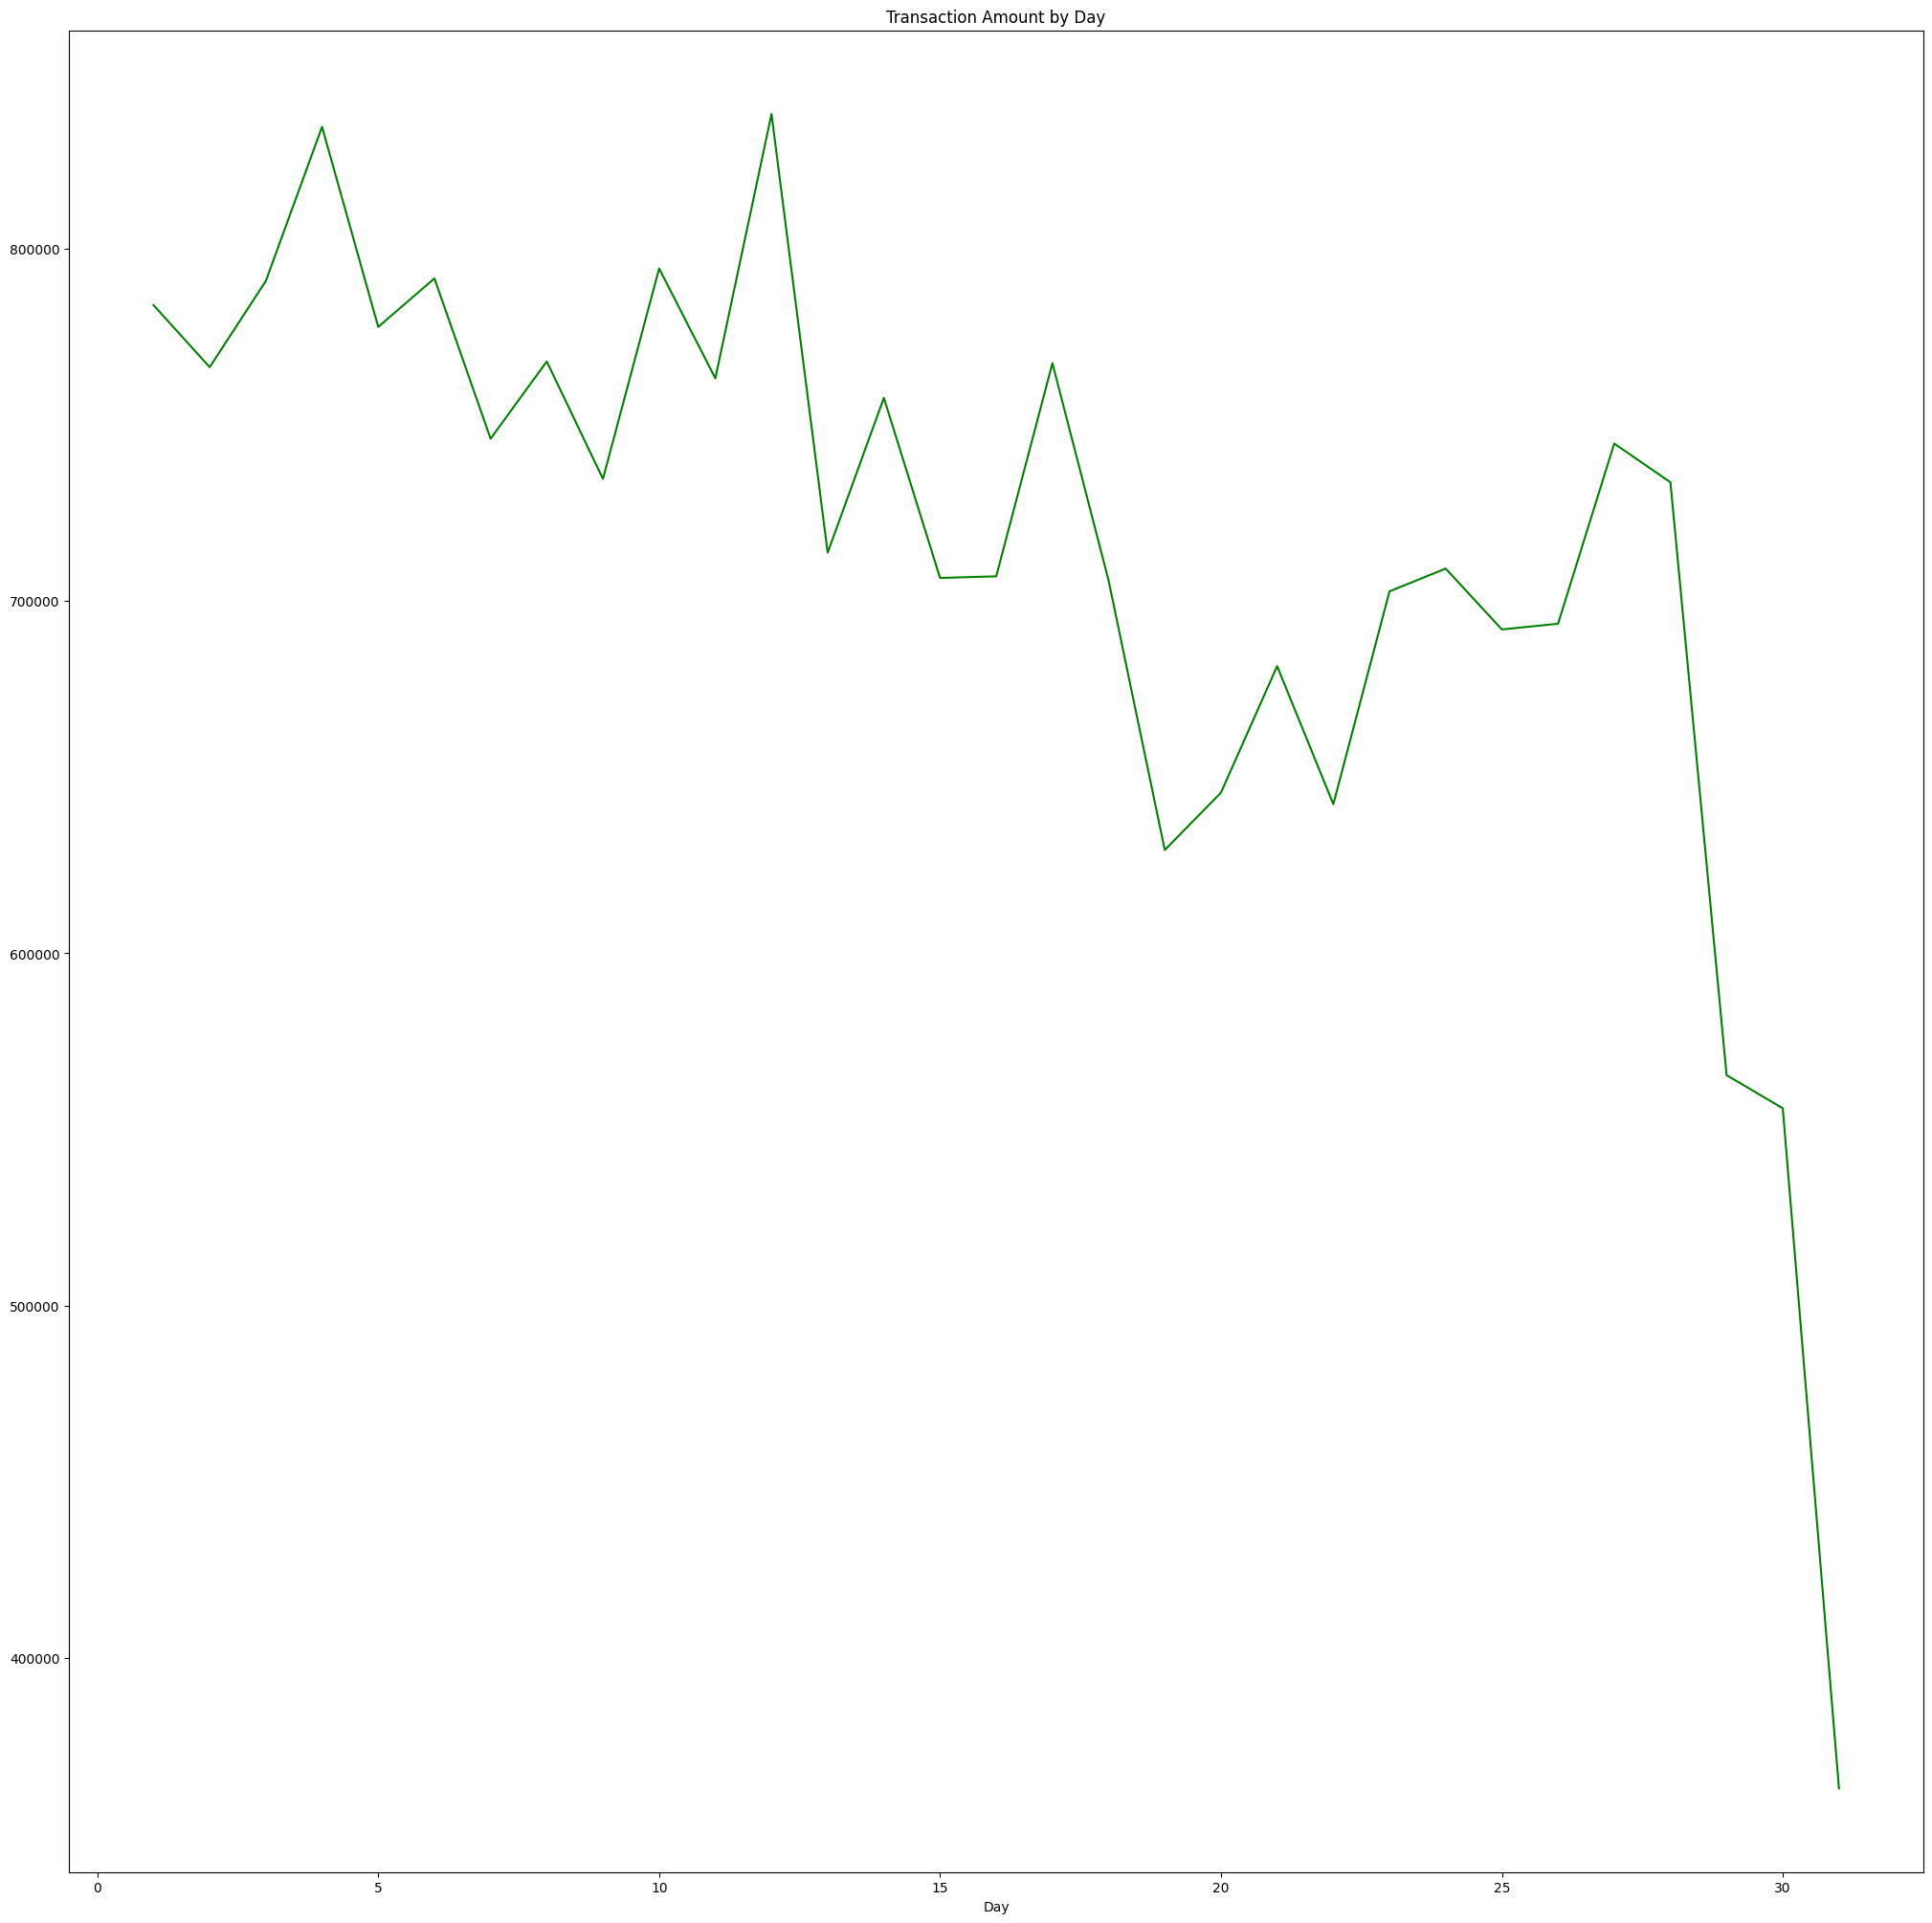

In [49]:
day_data = ts_df.groupby("Day").agg({"Transaction Amount": ["sum","mean"]})['Transaction Amount']
day_data["sum"].plot(color="green",figsize=(25,25))
plt.title("Transaction Amount by Day")

Text(0.5, 1.0, 'Average Daily Transaction Totals')

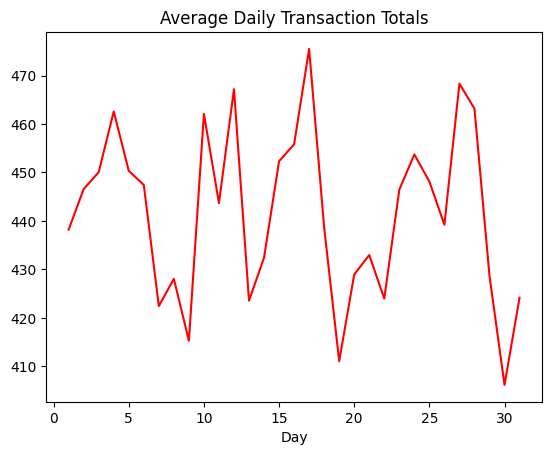

In [54]:
day_data["mean"].plot(color="red")
plt.title("Average Daily Transaction Totals")

From the tables shown, the earlier days of the month had the most transaction amount while the days at the end of the month have the least.
But the Average Transaction Amount by day were volatile and didnt have a perticular pattern

# Conclusion:
From this data set we have analized Transaction Amounts from particular fields such as Diffrent Categories,Genders to see spendig patterns in Data as well as Analizing Spending patterns by Month and days in the month. Thank you and i hope you gained insights from this.